## Importar librerias

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


## Exploracion y limpieza del dataset

Features ordinales
- Neighborhood_Quality 

Features numericos 
- Square_Footage 
- Lot_Size 
- House_Price 
- Num_Bedrooms
- Num_Bathrooms
- Garage_Size
- Year_Built




In [63]:
# Cargar el dataset
df = pd.read_csv('dataset.csv')
df.head() # Muestra las primeras filas

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


### Convertir escala de features

In [64]:
# Pasar de pies a metros
df['Square_meters'] = df['Square_Footage'] * 0.092903
# Pasar de acres a metros cuadrados
df['Lot_Size'] = df['Lot_Size'] * 4046.86
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Square_meters
0,1360,2,1,1981,2426.645531,0,5,2.623829e+05,126.348080
1,4272,3,3,2016,19234.781627,1,6,9.852609e+05,396.881616
2,3592,1,2,2016,14709.618675,0,9,7.779774e+05,333.707576
3,966,1,2,1977,11050.626554,1,8,2.296989e+05,89.744298
4,4926,2,1,1993,19016.488759,0,8,1.041741e+06,457.640178


### Revision inicial de datos

In [65]:
df.info()  # Revisión de tipos de datos y valores nulos
df.describe()  # Resumen estadístico de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
 8   Square_meters         1000 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Square_meters
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,2815.422000,2.990000,1.973000,1986.550000,11242.530886,1.022000,5.615000,6.188610e+05,261.561150
std,1255.514921,1.427564,0.820332,20.632916,5252.432326,0.814973,2.887059,2.535681e+05,116.641103
min,503.000000,1.000000,1.000000,1950.000000,2047.946765,0.000000,1.000000,1.116269e+05,46.730209
25%,1749.500000,2.000000,1.000000,1969.000000,6741.849216,0.000000,3.000000,4.016482e+05,162.533798
50%,2862.500000,3.000000,2.000000,1986.000000,11370.626082,1.000000,6.000000,6.282673e+05,265.934838
75%,3849.500000,4.000000,3.000000,2004.250000,15877.116305,2.000000,8.000000,8.271413e+05,357.630099
max,4999.000000,5.000000,3.000000,2022.000000,20191.009525,2.000000,10.000000,1.108237e+06,464.422097


### Visualizacion de distribuciones

#### Histogramas

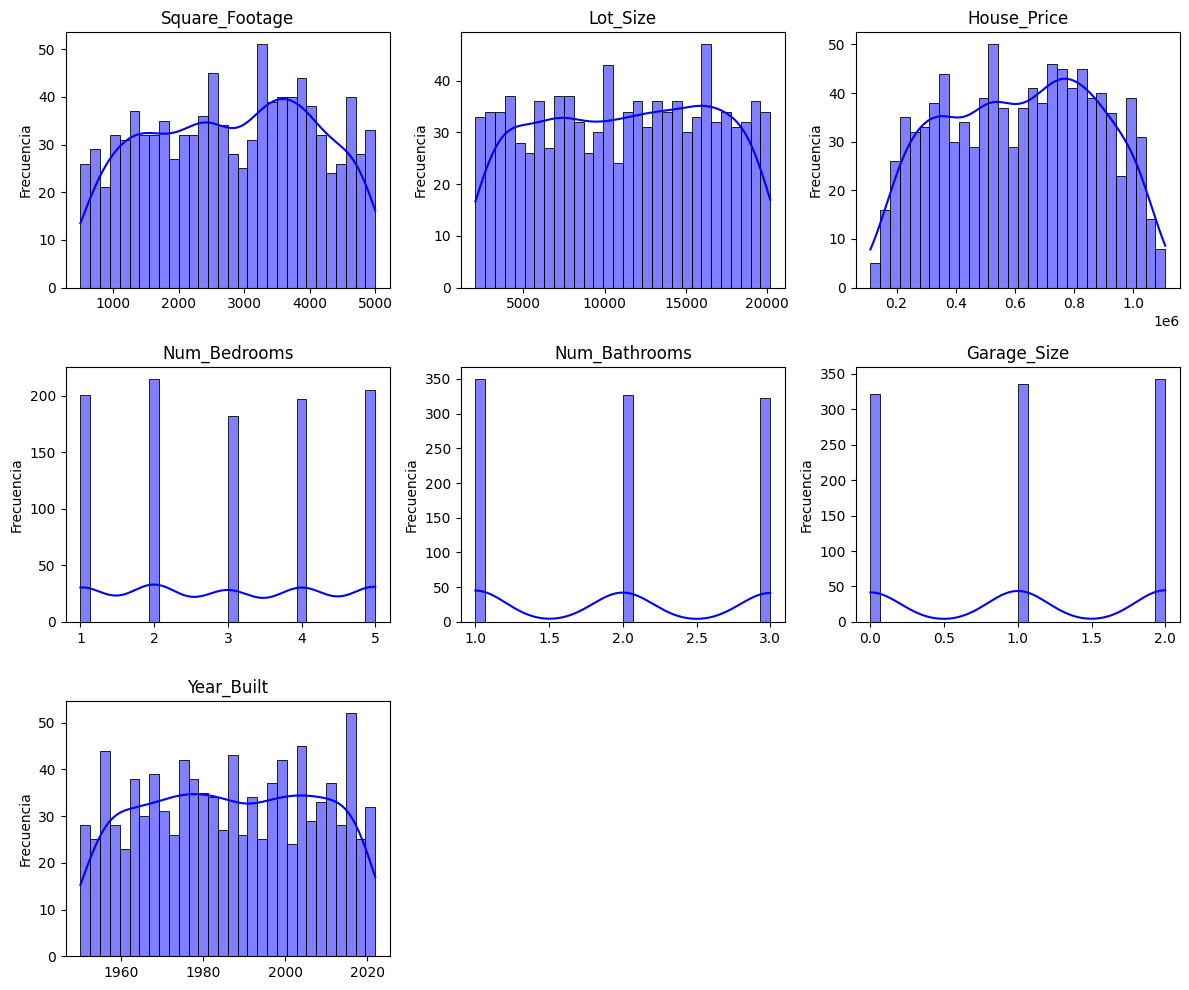

In [66]:
# Lista de columnas a graficar
features = [
    "Square_Footage", "Lot_Size", "House_Price",
    "Num_Bedrooms", "Num_Bathrooms", "Garage_Size", "Year_Built"
]

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear histogramas para cada variable
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#### Diagramas de caja

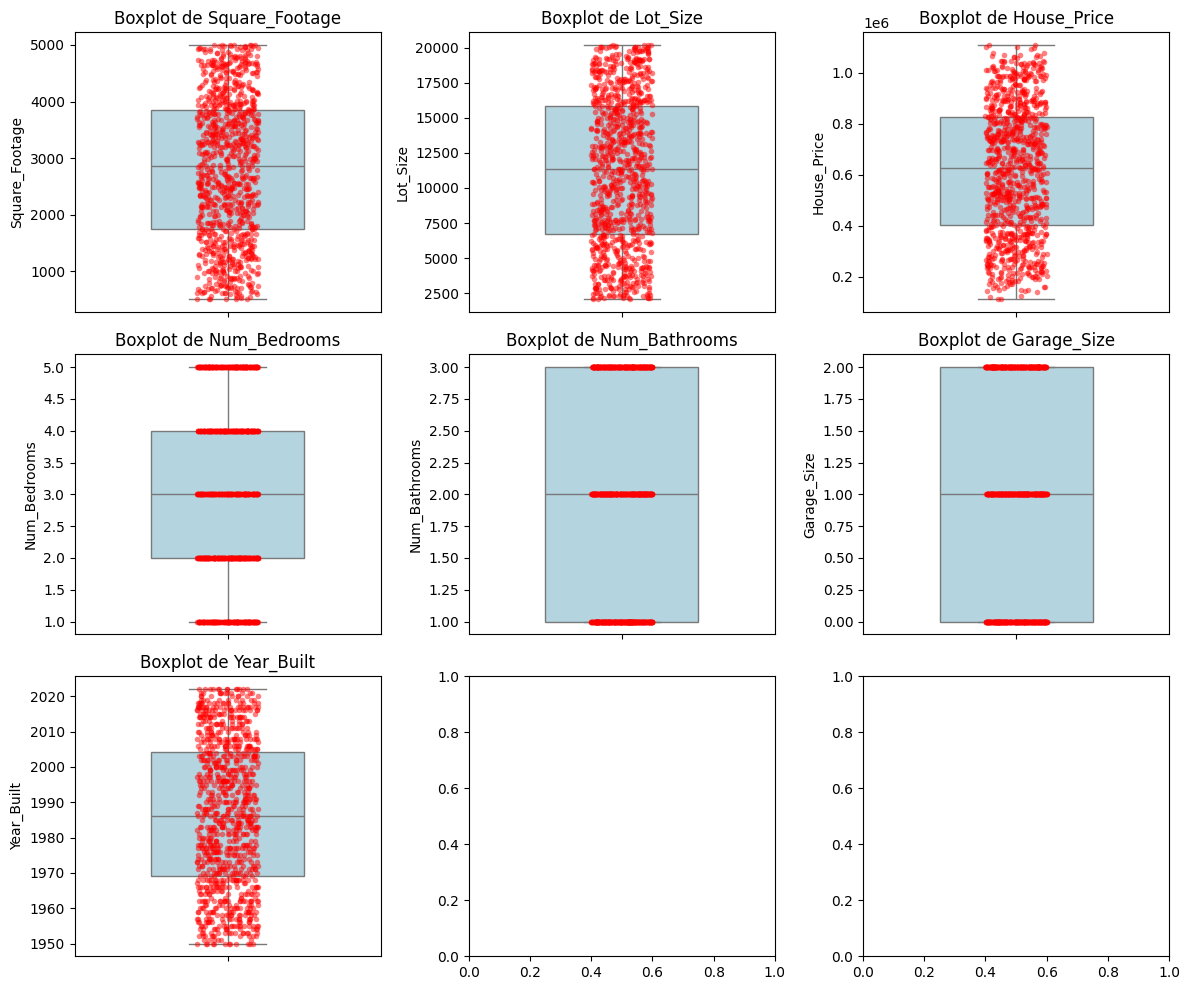

In [67]:
# Configurar la figura y subgráficas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))  # 3 filas, 3 columnas
axes = axes.flatten()  # Convertir en lista

# Crear boxplots con puntos superpuestos
for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i], color="lightblue", width=0.5)  # Boxplot
    sns.stripplot(y=df[feature], ax=axes[i], color="red", alpha=0.5, size=4, jitter=True)  # Puntos

    axes[i].set_title(f"Boxplot de {feature}")

# Ajustar el diseño
plt.tight_layout()
plt.show()

#### Grafico de barras (Feature ordinal)

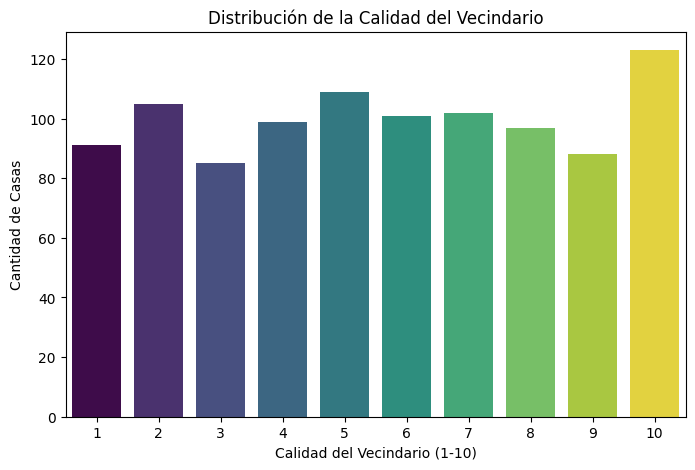

In [68]:
# Contar la cantidad de casas en cada nivel de calidad
quality_counts = df["Neighborhood_Quality"].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=quality_counts.index, y=quality_counts.values, hue=quality_counts.index, palette="viridis", legend=False)
plt.xlabel("Calidad del Vecindario (1-10)")
plt.ylabel("Cantidad de Casas")
plt.title("Distribución de la Calidad del Vecindario")
plt.show()

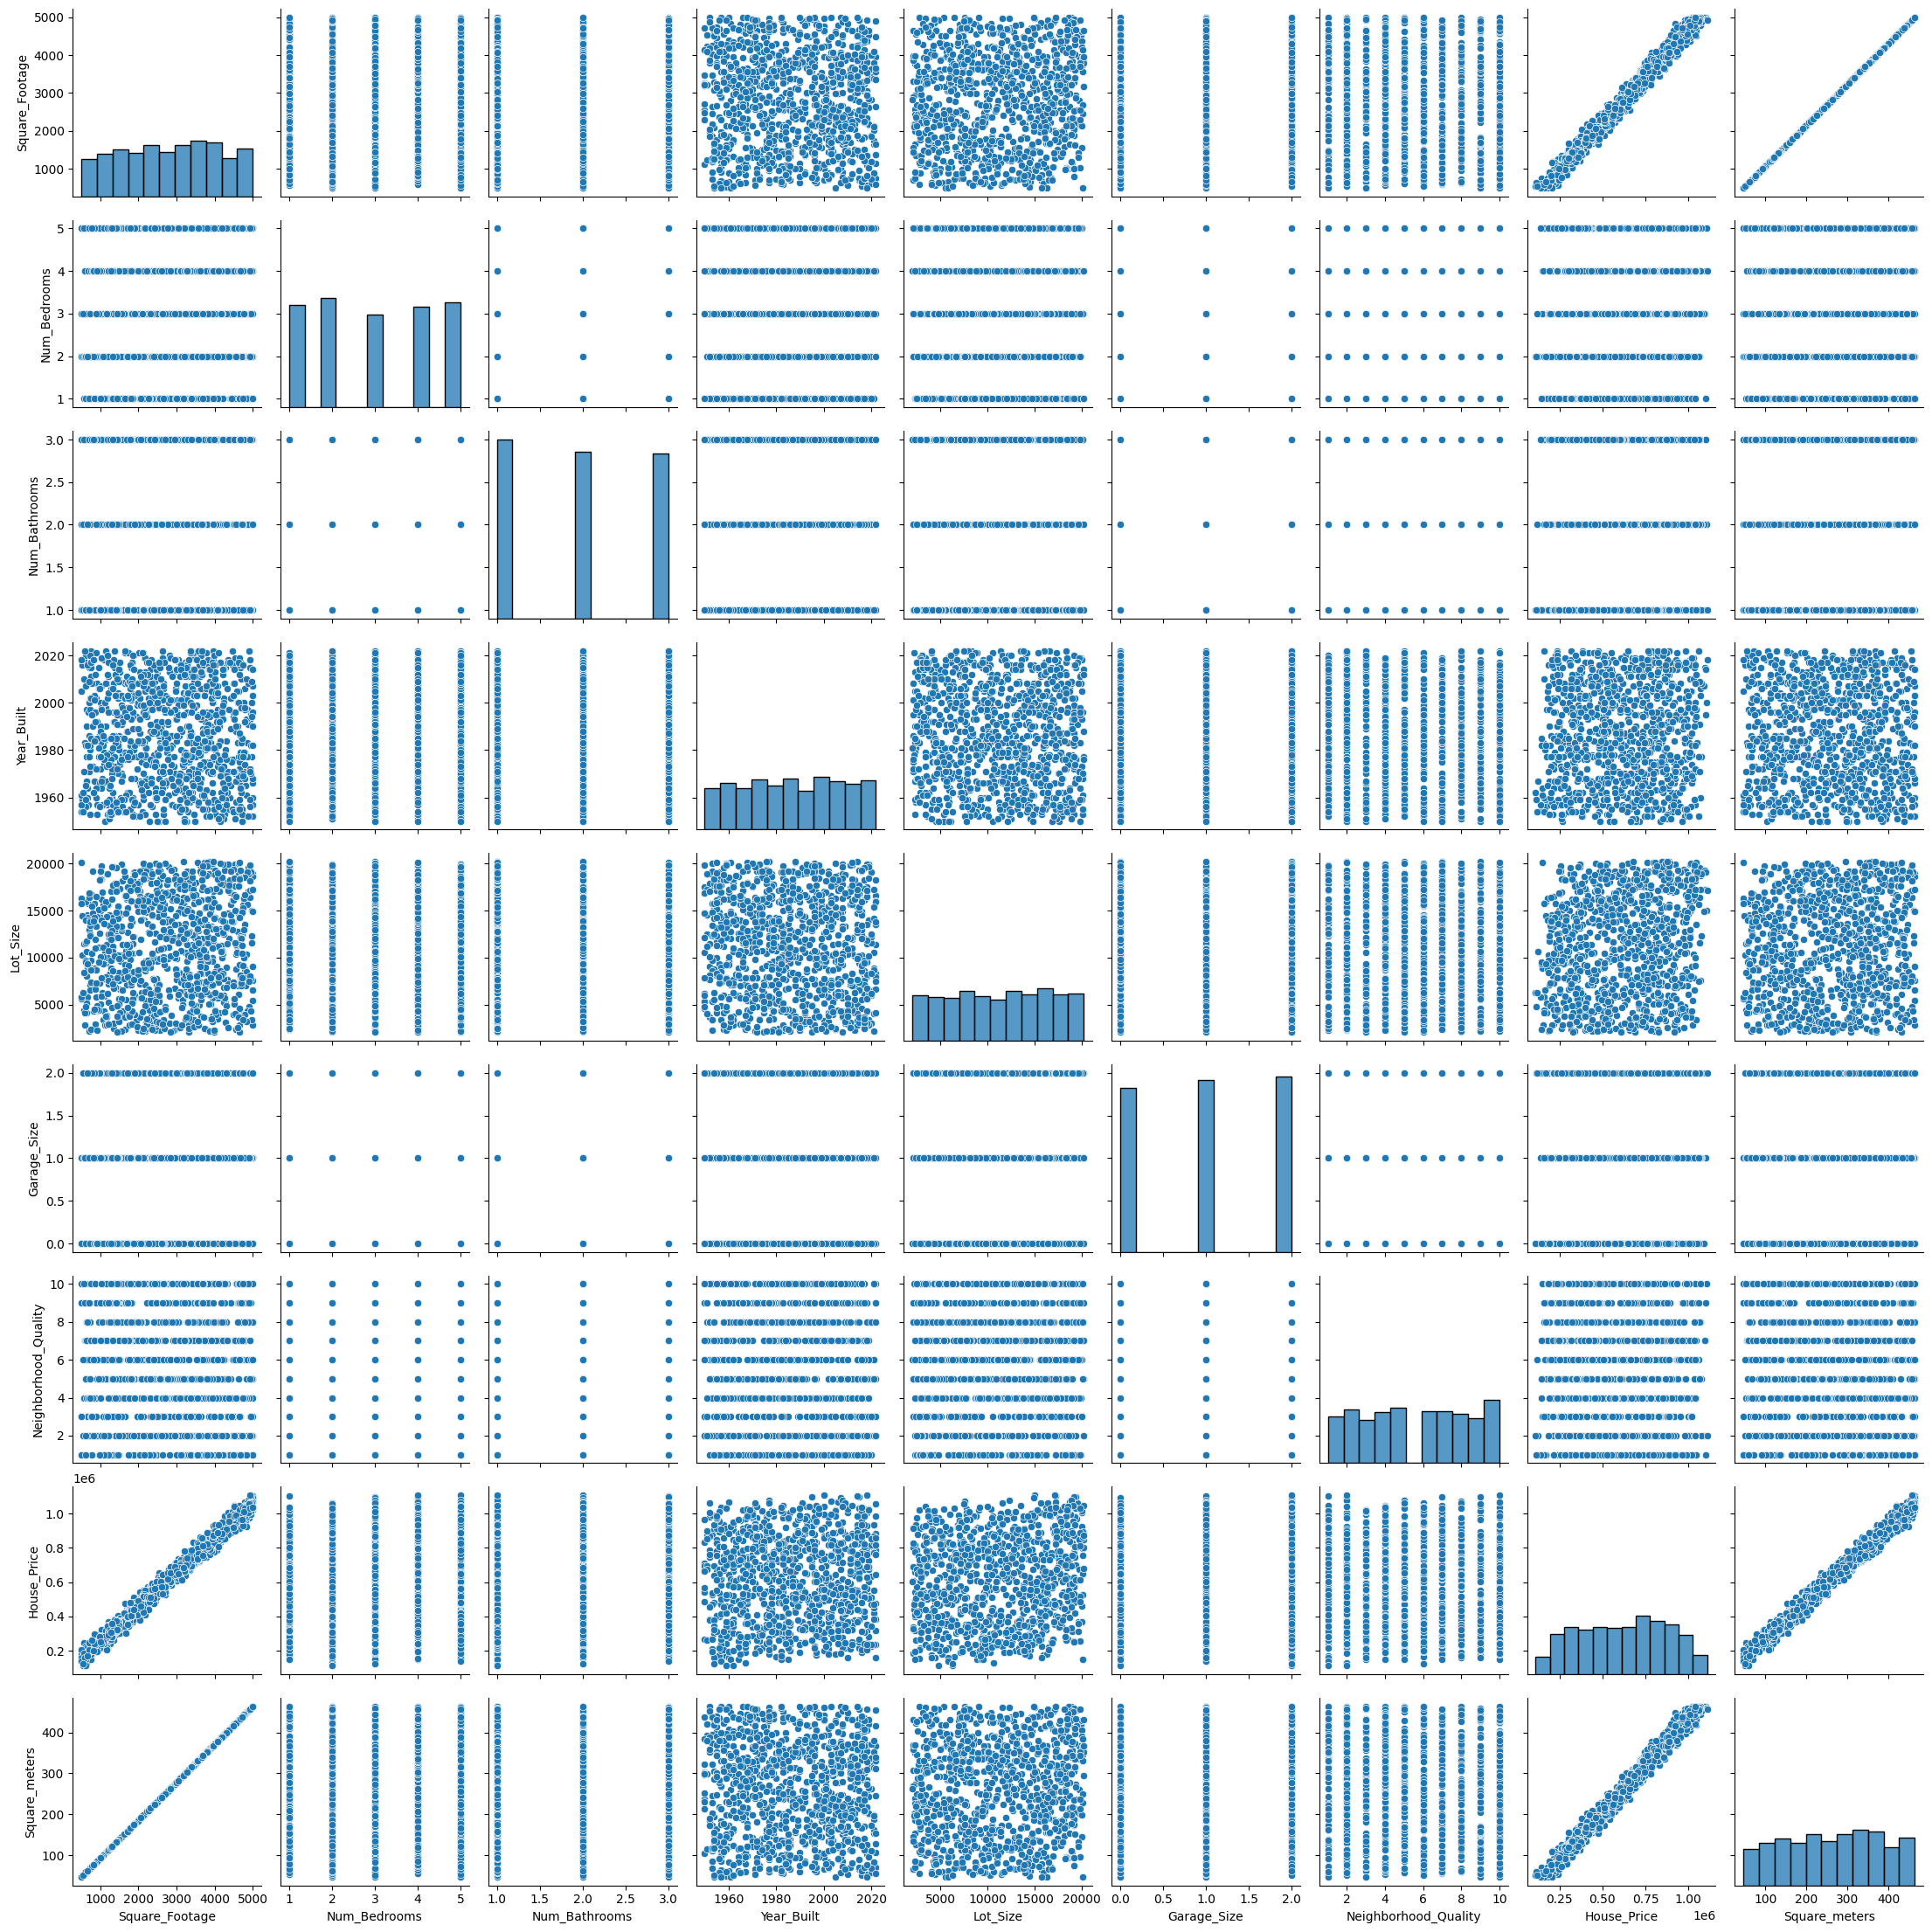

In [69]:
sns.pairplot(df)

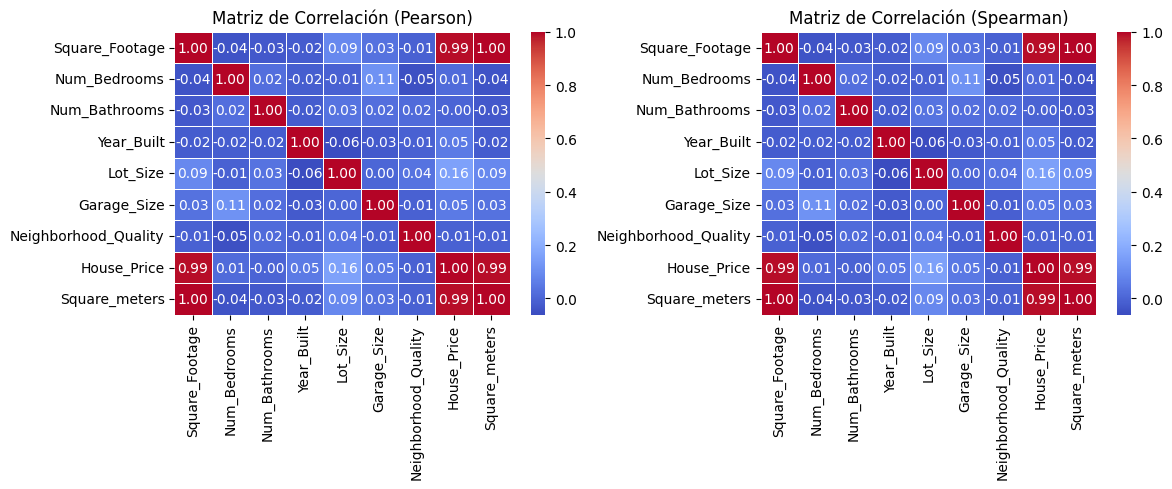

In [70]:
# Seleccionar solo columnas numéricas
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

# calcular pearson correlation
pearson_correlation = df[numerical_features].corr(method='pearson')

# calcular spearman correlation
spearman_correlation = df[numerical_features].corr(method='spearman')

# Visualizar las correlaciones
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 5))

# Heatmap de Pearson
plt.subplot(1, 2, 1)
sns.heatmap(pearson_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Pearson)")

# Heatmap de Spearman
plt.subplot(1, 2, 2)
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Spearman)")

plt.tight_layout()
plt.show()


### Normalizacion de datos

In [71]:
# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a los datos numéricos
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Mostrar el DataFrame normalizado
print(df_scaled.head())

   Square_Footage  Num_Bedrooms  ...  House_Price  Square_meters
0        0.190614          0.25  ...     0.151269       0.190614
1        0.838301          0.50  ...     0.876606       0.838301
2        0.687055          0.00  ...     0.668617       0.687055
3        0.102980          0.00  ...     0.118474       0.102980
4        0.983763          0.25  ...     0.933278       0.983763

[5 rows x 9 columns]


## Regresion Lineal (punto 3)

### 1) Modelo que toma en cuenta todas las etiquetas

#### Separar X y Y


In [72]:
# Separar características y variable objetivo
X = df_scaled.drop(columns=['House_Price'])
y = df_scaled['House_Price']

# Agregar columna de unos para el término de sesgo
X.insert(0, 'Bias', 1)

# Convertir a matrices numpy
X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)


#### Dividir en conjunto de entrenamiento (70%) y prueba (15% y 15%)

In [73]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
m = X.shape[0]
train_size = int(m * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#### Probar distintos valores de α

In [74]:
# Probar distintos valores de alpha
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
mse_results = {}
final_ws = {}

for alpha in alphas:
    # Inicializar parámetros w con ceros
    n = X.shape[1]  # Número de características (8 + bias)
    w = np.zeros((n, 1))
    num_iter = 1000  # Número de iteraciones
    mse_history = []

    # Descenso del gradiente
    m_train = len(y_train)
    for _ in range(num_iter):
        predictions = X_train.dot(w)  # Calcular hipótesis
        error = predictions - y_train  # Diferencia con valores reales
        gradient = (1/m_train) * X_train.T.dot(error)  # Cálculo del gradiente
        w -= alpha * gradient  # Actualización de parámetros
        
        # Calcular y almacenar MSE en cada iteración
        mse = (1 / (2 * m_train)) * np.sum((error) ** 2)
        mse_history.append(mse)
    
    mse_results[alpha] = mse_history
    final_ws[alpha] = w

#### Convergencia de MSE para distintos valores de α

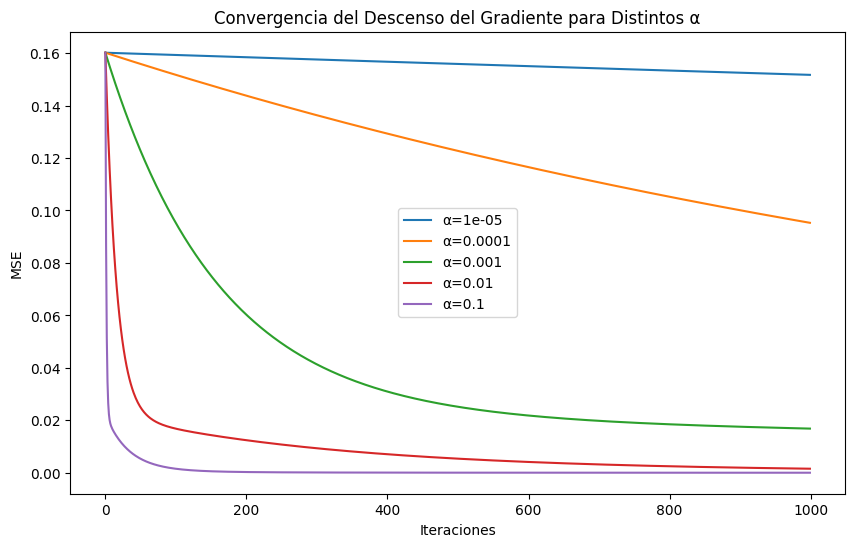

In [75]:
# Graficar la convergencia de MSE para distintos valores de α
plt.figure(figsize=(10, 6))
for alpha, mse_history in mse_results.items():
    plt.plot(range(num_iter), mse_history, label=f'α={alpha}')

plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Convergencia del Descenso del Gradiente para Distintos α')
plt.legend()
plt.show()

#### Evaluar modelo


In [76]:
# Evaluar modelo en el conjunto de prueba
for alpha, w in final_ws.items():
    predictions_test = X_test.dot(w)
    mse_test = mean_squared_error(y_test, predictions_test)
    print(f'α: {alpha}, MSE en prueba: {mse_test:.6f}')
    
    # Probar con un valor de prueba
    test_sample = X_test[0].reshape(1, -1)
    expected_value = y_test[0]
    predicted_value = test_sample.dot(w)
    print(f'α: {alpha}, Valor esperado: {expected_value[0]:.6f}, Valor obtenido: {predicted_value[0][0]:.6f}')


α: 1e-05, MSE en prueba: 0.319930
α: 1e-05, Valor esperado: 0.464331, Valor obtenido: 0.012723
α: 0.0001, MSE en prueba: 0.201917
α: 0.0001, Valor esperado: 0.464331, Valor obtenido: 0.111148
α: 0.001, MSE en prueba: 0.033293
α: 0.001, Valor esperado: 0.464331, Valor obtenido: 0.404293
α: 0.01, MSE en prueba: 0.002998
α: 0.01, Valor esperado: 0.464331, Valor obtenido: 0.480996
α: 0.1, MSE en prueba: 0.000092
α: 0.1, Valor esperado: 0.464331, Valor obtenido: 0.479540


### 2) Modelo que toma en cuenta solo 'Square_meters'

#### Separar X y Y


In [77]:
# Datos normalizados ya cargados en df_scaled
# Seleccionar solo la variable Square_meters como característica
X = df_scaled[['Square_meters']]
y = df_scaled['House_Price']

# Agregar columna de unos para el término de sesgo
X.insert(0, 'Bias', 1)

# Convertir a matrices numpy
X = X.to_numpy()
y = y.to_numpy().reshape(-1, 1)

#### Dividir en conjunto de entrenamiento (80%) y prueba (20%)

In [78]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
m = X.shape[0]
train_size = int(m * 0.7)
val_size = int(m*0.15)
test_size = m - train_size - val_size

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

#### Probar distintos valores de α

In [ ]:
# Probar distintos valores de alpha
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
mse_results = {}
final_ws = {}
val_mse_results = {}

for alpha in alphas:
    # Inicializar parámetros w con ceros
    n = X.shape[1]  # Número de características (1 + bias)
    w = np.zeros((n, 1))
    num_iter = 1000  # Número de iteraciones
    mse_history = []
    val_mse_history = []

    # Descenso del gradiente
    m_train = len(y_train)
    for _ in range(num_iter):
        predictions = X_train.dot(w)  # Calcular hipótesis
        error = predictions - y_train  # Diferencia con valores reales
        gradient = (1/m_train) * X_train.T.dot(error)  # Cálculo del gradiente
        w -= alpha * gradient  # Actualización de parámetros
        
        # Calcular y almacenar MSE en cada iteración
        mse = (1 / (2 * m)) * np.sum((error) ** 2)
        mse_history.append(mse)

        val_predictions = X_val.dot(w)
        val_error = val_predictions - y_val
        val_mse = (1 / (2 * len(y_val))) * np.sum((val_error) ** 2)
        val_mse_history.append(val_mse)
    
    mse_results[alpha] = mse_history
    val_mse_results[alpha] = val_mse_history
    final_ws[alpha] = w


NameError: name 'W' is not defined

#### Convergencia de MSE para distintos valores de α

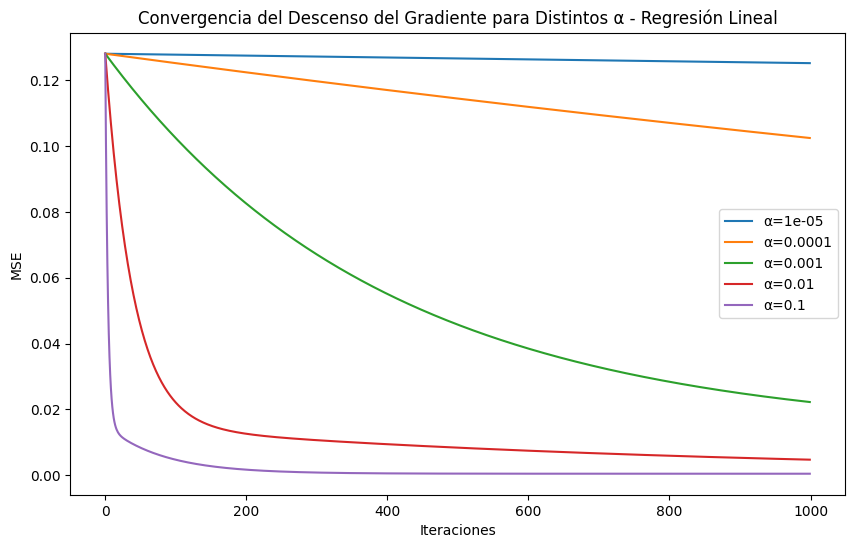

In [ ]:
# Graficar la convergencia de MSE para distintos valores de alpha
plt.figure(figsize=(10, 6))
for alpha, mse_history in mse_results.items():
    plt.plot(range(num_iter), mse_history, label=f'α={alpha}')

plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Convergencia del Descenso del Gradiente para Distintos α - Regresión Lineal')
plt.legend()
plt.show()

#### Grafica de la regresion lineal

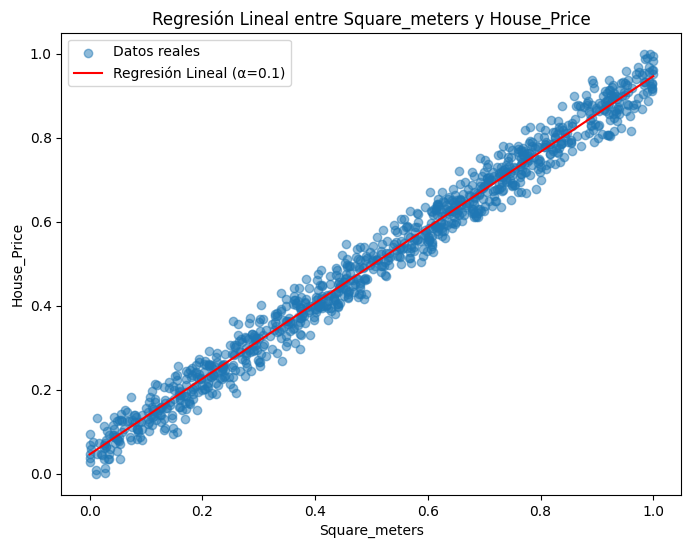

In [ ]:
# Graficar la regresión lineal
best_alpha = 0.1  # Se elige un alpha intermedio
best_w = final_ws[best_alpha]

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Square_meters'], df_scaled['House_Price'], label='Datos reales', alpha=0.5)
x_vals = np.linspace(df_scaled['Square_meters'].min(), df_scaled['Square_meters'].max(), 100)
y_vals = best_w[0] + best_w[1] * x_vals
plt.plot(x_vals, y_vals, color='red', label=f'Regresión Lineal (α={best_alpha})')
plt.xlabel('Square_meters')
plt.ylabel('House_Price')
plt.title('Regresión Lineal entre Square_meters y House_Price')
plt.legend()
plt.show()

#### Evaluar modelo


In [ ]:
# Evaluar modelo en el conjunto de prueba
for alpha, w in final_ws.items():
    predictions_test = X_val.dot(w)
    mse_test = mean_squared_error(y_test, predictions_test)
    print(f'α: {alpha}, MSE en prueba: {mse_test:.6f}')
    
    # Probar con un valor de prueba
    test_sample = X_val[0].reshape(1, -1)
    expected_value = y_test[0]
    predicted_value = test_sample.dot(w)
    print(f'α: {alpha}, Valor esperado: {expected_value[0]:.6f}, Valor obtenido: {predicted_value[0][0]:.6f}')

α: 1e-05, MSE en prueba: 0.033003
α: 1e-05, Valor esperado: 0.464331, Valor obtenido: 0.006604
α: 0.0001, MSE en prueba: 0.027045
α: 0.0001, Valor esperado: 0.464331, Valor obtenido: 0.062385
α: 0.001, MSE en prueba: 0.005753
α: 0.001, Valor esperado: 0.464331, Valor obtenido: 0.374512
α: 0.01, MSE en prueba: 0.001118
α: 0.01, Valor esperado: 0.464331, Valor obtenido: 0.504692
α: 0.1, MSE en prueba: 0.000102
α: 0.1, Valor esperado: 0.464331, Valor obtenido: 0.484080


#### Grafica MSE y MSE de validacion

In [ ]:
plt.figure(figsize=(12, 8))
for alpha in alphas:
    plt.plot(mse_results[alpha], label=f'Training MSE (α={alpha})')
    plt.plot(val_mse_results[alpha], label=f'Validation MSE (α={alpha})', linestyle='--')

plt.title('Training and Validation MSE for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()